In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

import matplotlib.pyplot as plt
from IPython.display import HTML

from tqdm import tqdm

%matplotlib inline
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams['axes.titlesize'] = 16

In [3]:
cal = pd.read_csv('../input/m5-forecasting-accuracy/calendar.csv')
stv = pd.read_csv('../input/m5-forecasting-accuracy/sales_train_validation.csv')
sellp = pd.read_csv('../input/m5-forecasting-accuracy/sell_prices.csv')

In [4]:
#missing value
cal_na = (cal.isnull().sum() / len(cal)) * 100
cal_na = cal_na.drop(cal_na[cal_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :cal_na})
missing_data

,Missing Ratio
event_name_2,99.746064
event_type_2,99.746064
event_name_1,91.772473
event_type_1,91.772473


In [5]:
#missing value
stv_na = (stv.isnull().sum() / len(cal)) * 100
stv_na = stv_na.drop(stv_na[stv_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :stv_na})
missing_data # no missing value

,Missing Ratio


In [6]:
#missing value
sellp_na = (sellp.isnull().sum() / len(cal)) * 100
sellp_na = sellp_na.drop(sellp_na[sellp_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :sellp_na})
missing_data # no missing value

,Missing Ratio


In [7]:
def disp_boxplot(data, title, xlabel, ylabel):
    sns.set_style('whitegrid')
    sns.set_context('poster')
    palette = sns.color_palette("hls", 8)
    
    ax = sns.boxplot(data=data, palette = palette)
    ax.set(title = title,
          xlabel = xlabel,
          ylabel = ylabel)
    
    try:
        ax.axhline(y = data.mean().mean(), color = 'b', label = 'Mean of all datapoints', linestyle = '--', linewidth = 1.5)
        ax.ahline(y = data.median().median(), color = 'g', label = 'Median of all datapoints', linestyle = '--', linewidth = 1.5)
    except:
        pass
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    
    plt.legend()
    plt.show()

In [8]:
#sale by department
dept_sales = stv.groupby(['dept_id']).mean().mean()
dept_sum = stv.groupby(['dept_id']).sum().T.reset_index(drop = True)
stv.groupby(['dept_id']).sum()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
dept_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FOODS_1,2343,2216,1657,1508,1209,1897,1903,2235,1925,1586,1785,1737,2048,2349,2948,3688,2193,1552,1617,1502,1866,2391,2164,1784,1480,...,2493,3403,3466,3316,2590,2666,2656,2693,3231,3974,3459,2806,2805,2591,2583,3192,3523,3062,2461,2544,2657,2639,3169,3712,3185
FOODS_2,4094,4209,3174,3606,2869,4375,3349,4384,4273,3684,3255,3696,3592,3743,4722,4889,3021,3899,3219,2790,3030,3821,3853,3184,2598,...,4195,5784,7208,8224,6172,6514,6243,5495,6042,8549,8081,6845,6462,5124,5518,5661,5792,6588,5247,4942,4734,4446,4974,5524,6473
FOODS_3,16741,16333,12343,13764,10525,15821,15238,21132,18664,13631,11923,12222,11700,12946,17517,18079,10801,11974,10515,9998,11698,14726,14011,11405,9965,...,15439,19440,23610,26093,18263,18063,18339,17467,20176,25811,24906,19440,18157,16173,17355,19829,22692,24847,18443,17462,16241,16232,18561,22691,22996
HOBBIES_1,3610,3172,2497,2531,1714,3133,2855,3831,2741,2514,2412,2355,2524,2698,3567,3221,2106,2389,2031,1915,2131,3985,2809,2532,2344,...,3104,4407,4458,4494,3285,3189,3031,3020,3641,4337,4033,3395,3016,3182,3366,3367,4220,4325,3038,3420,3141,3014,3678,4397,4226
HOBBIES_2,154,185,185,138,100,87,89,155,158,101,135,102,176,124,132,196,127,165,139,134,153,157,169,203,115,...,317,383,405,409,376,288,348,423,425,402,492,321,368,375,420,419,414,495,285,367,331,339,407,390,457
HOUSEHOLD_1,4105,3858,2827,2732,1802,2664,3161,4334,3494,2857,2454,2418,2507,3158,4071,4407,2525,2964,2817,2894,3490,4750,4566,3433,2827,...,7269,9905,10915,11106,7795,7348,6948,7151,7689,10458,10187,7668,6512,6086,6519,7375,9253,9720,6776,6986,6393,6580,7762,9545,9795
HOUSEHOLD_2,1584,1776,1100,1133,927,1234,1415,1861,1481,1199,1107,1128,1209,1427,1876,1900,1031,1127,1105,1085,1353,1859,1711,1425,1172,...,1864,2214,2610,2783,1937,1615,1569,1867,2016,2809,2698,1952,1749,1662,1768,1946,2468,2603,1809,1849,1846,1783,1966,2703,2663


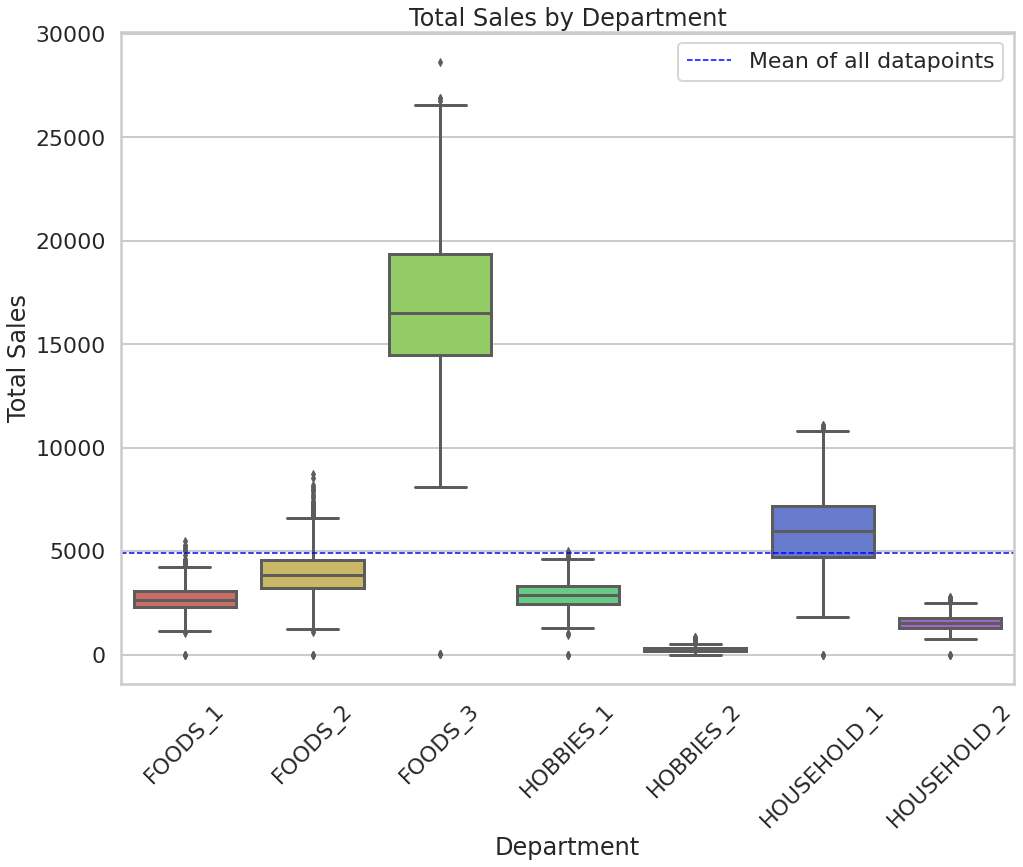

In [9]:
disp_boxplot(data = dept_sum, title = 'Total Sales by Department',xlabel = "Department", ylabel = "Total Sales")

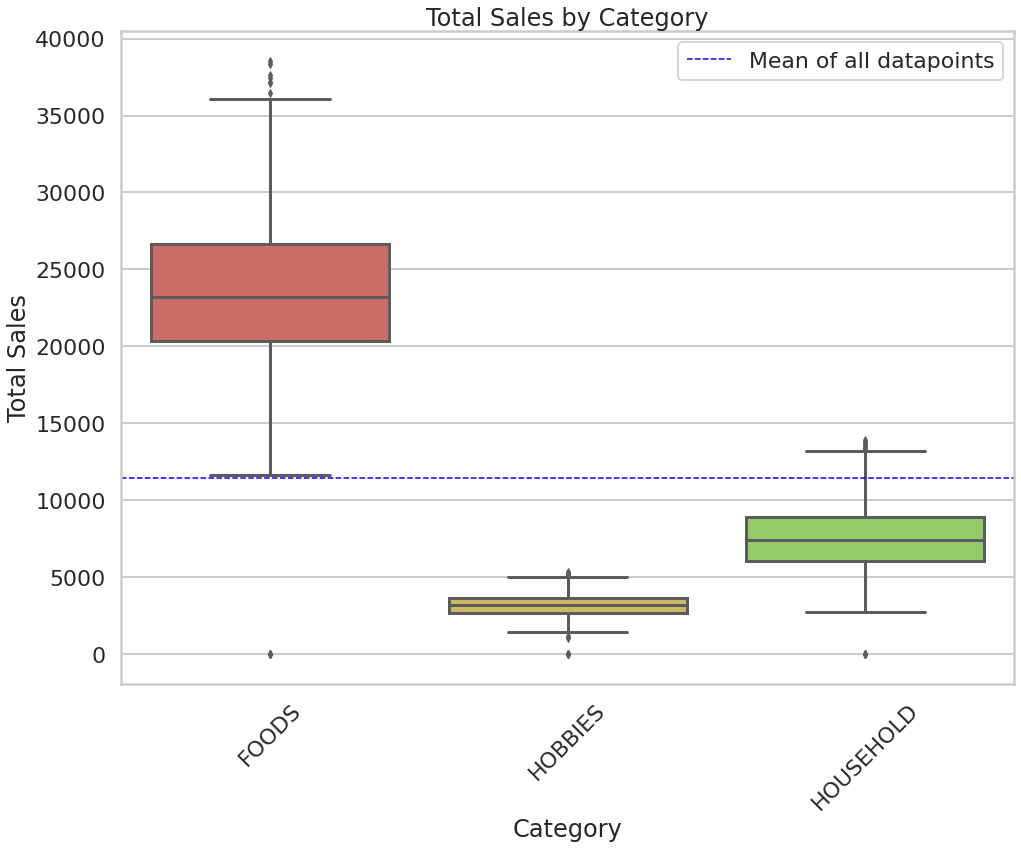

In [10]:
cat_sum = stv.groupby(['cat_id']).sum().T.reset_index(drop = True)
disp_boxplot(data = cat_sum, title = 'Total Sales by Category',
            xlabel = "Category", ylabel = "Total Sales")

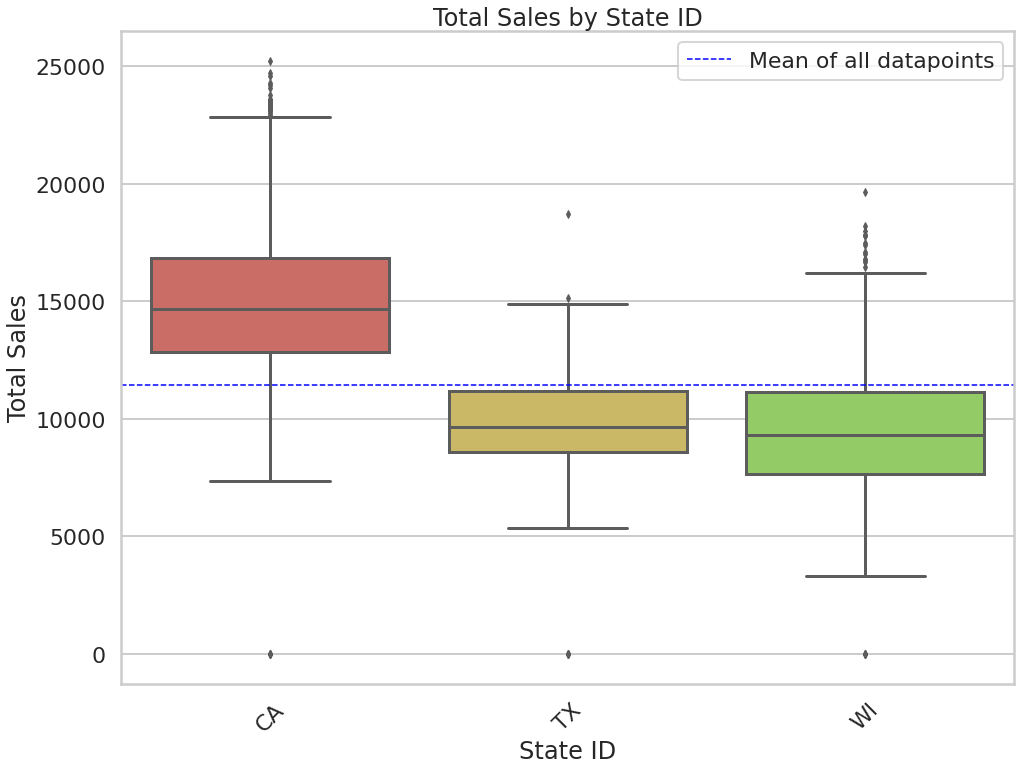

In [11]:
state_sum = stv.groupby(['state_id']).sum().T.reset_index(drop = True)
state_mean = stv.groupby(['state_id']).mean().T.reset_index(drop = True)

disp_boxplot(data = state_sum, title = 'Total Sales by State ID',
            xlabel = "State ID", ylabel = "Total Sales")



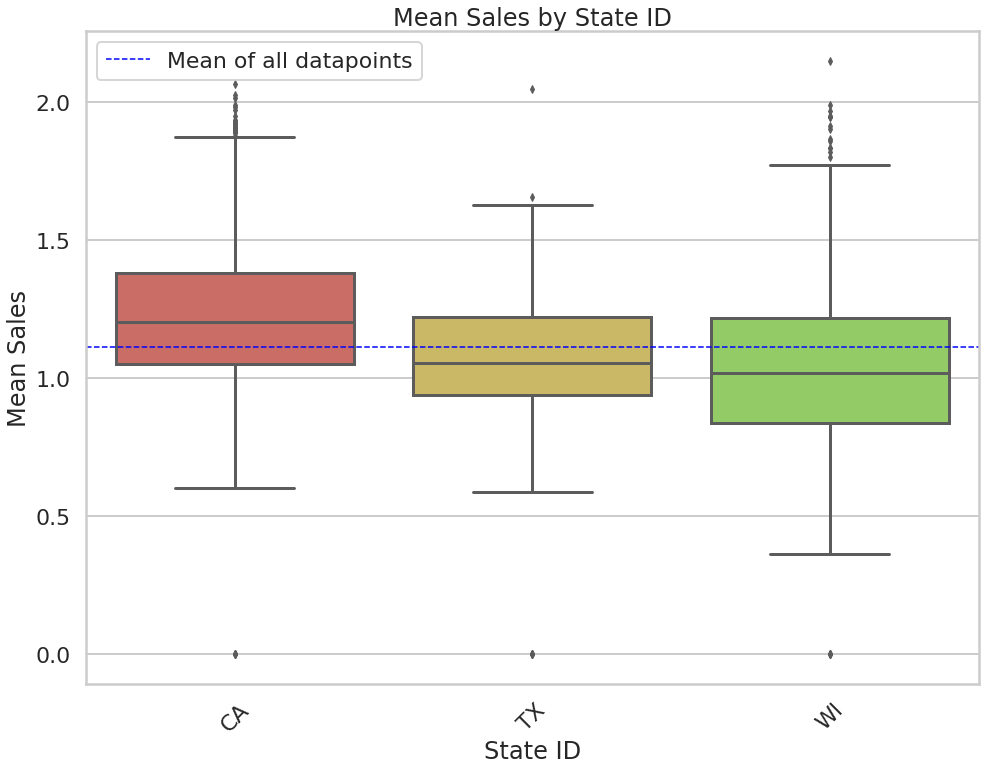

In [12]:
disp_boxplot(data = state_mean, title = 'Mean Sales by State ID',
            xlabel = "State ID", ylabel = "Mean Sales")

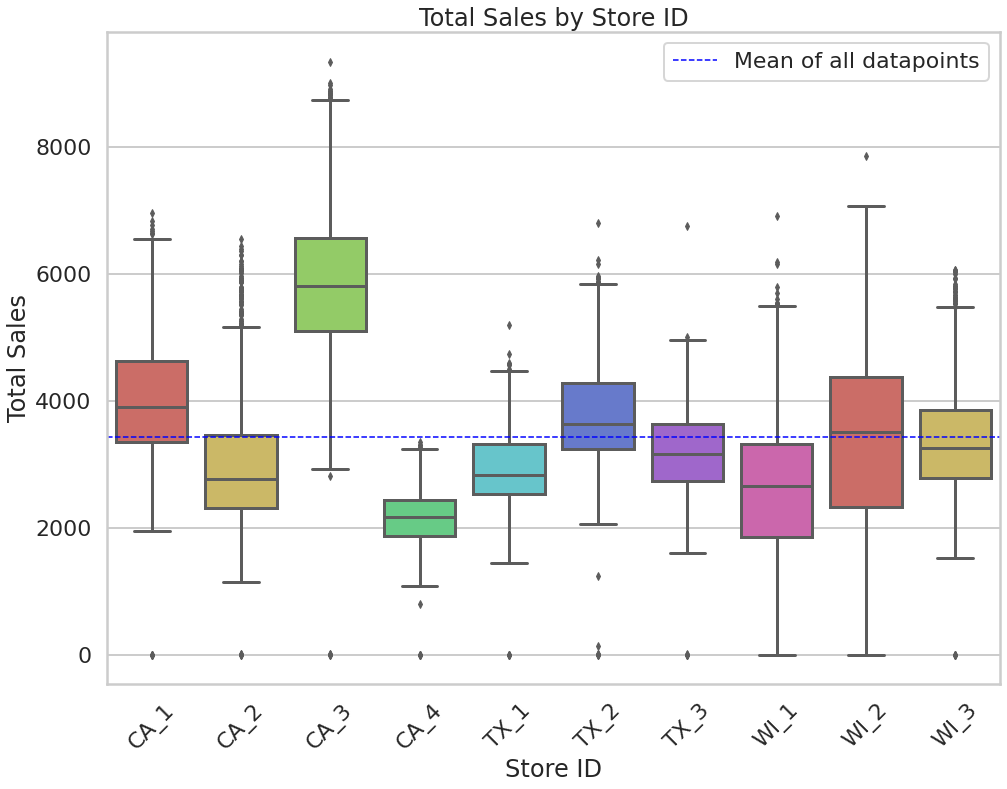

In [13]:
#sales differ by store
store_sum = stv.groupby(['store_id']).sum().T.reset_index(drop = True)
store_mean = stv.groupby(['store_id']).mean().T.reset_index(drop = True) 

disp_boxplot(data = store_sum, title = 'Total Sales by Store ID',
            xlabel = "Store ID", ylabel = "Total Sales")

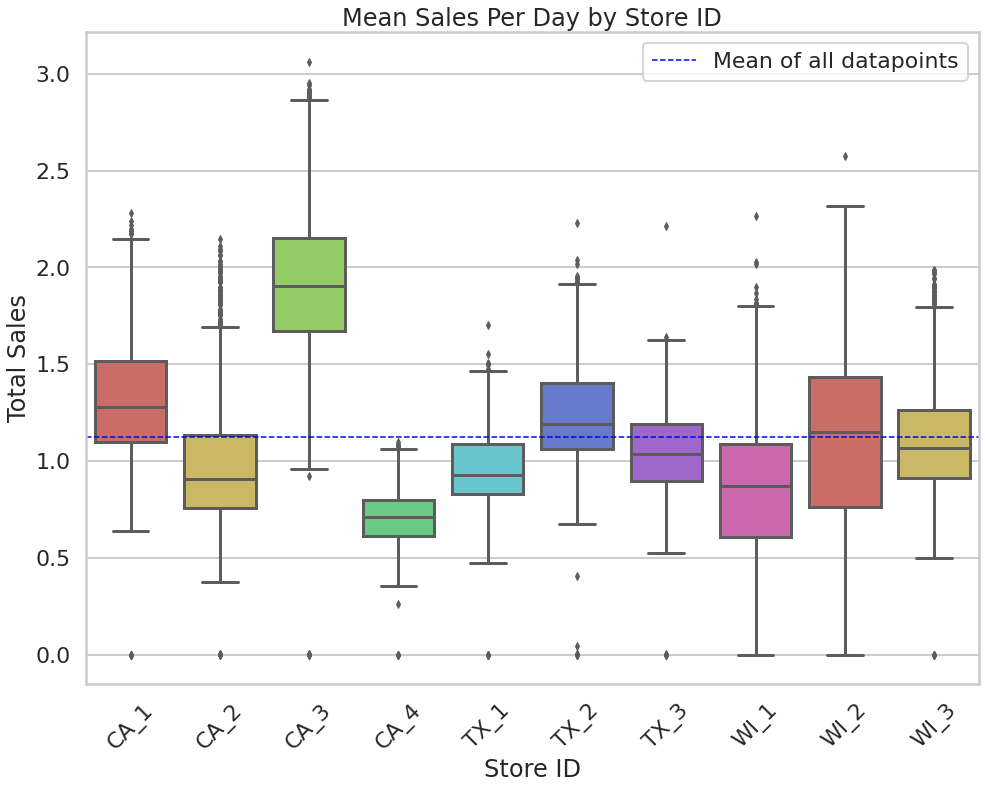

In [14]:
disp_boxplot(data = store_mean, title = 'Mean Sales Per Day by Store ID',
            xlabel = "Store ID", ylabel = "Total Sales")

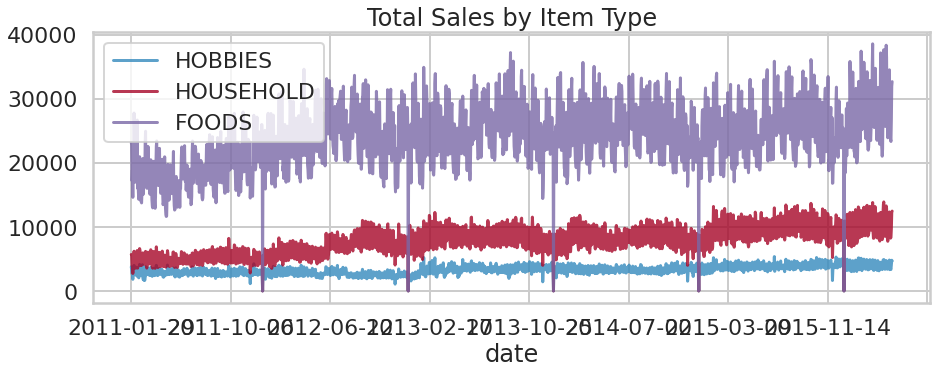

In [15]:
d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'].to_frame(),
           left_index=True,
           right_index=True) \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

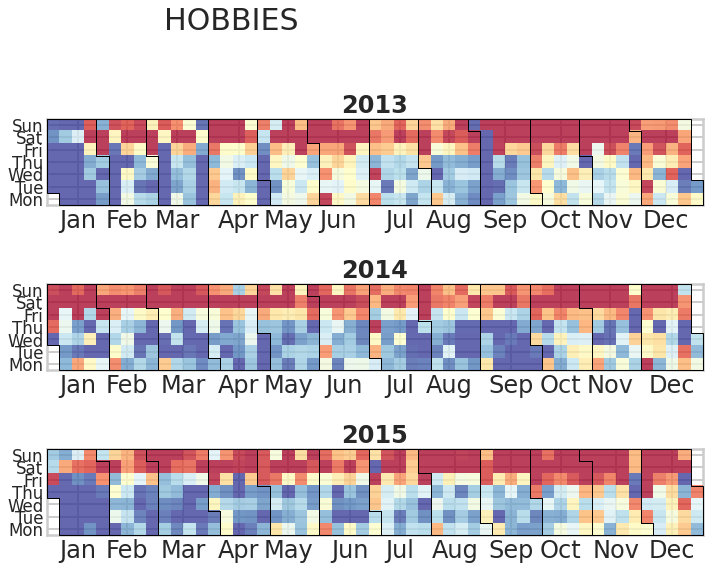

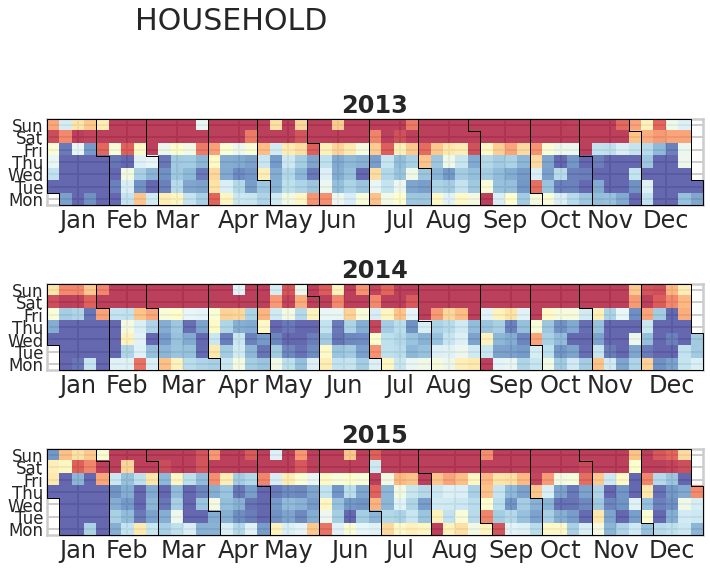

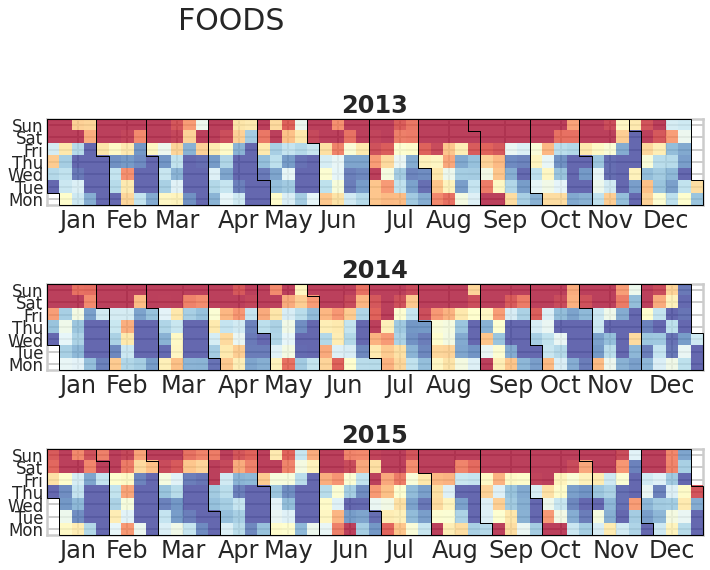

In [17]:
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in stv['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    plt.suptitle(i, fontsize=30, x=0.4, y=1.01)
    plt.tight_layout()
    plt.show()